# Exploratory Data Analysis Checklist
1. Formulate your question
1. Read in your data
1. Check the packaging
1. Run `str()`
1. Look at the top and the bottom of your data
1. Check your “n”s
1. Validate with at least one external data source
1. Try the easy solution first
1. Challenge your solution
1. Follow up

# 1. Formulate your question

For this example, we will look at an air pollution dataset from  U.S. Environmental Protection Agency (EPA).  We ask
> "Which counties in the United States have the highest levels of ambient ozone pollution?"

We are also interested (always) in asking
>"Do I have the right data to answer my question?"

# 2. Read in your data

In [2]:
# use readr package for faster reading of large csv files, apparently it's faster than the built in csv reader when the csvs are not complex
library (readr)
ozone <- readr::read_csv('hourly_44201_2014.csv', col_types='ccccinnccccccncnnccccccc')


In [3]:
# a trick to remove spaces from the column names
names(ozone) <- make.names(names(ozone))
head(ozone)

State.Code,County.Code,Site.Num,Parameter.Code,POC,Latitude,Longitude,Datum,Parameter.Name,Date.Local,⋯,Units.of.Measure,MDL,Uncertainty,Qualifier,Method.Type,Method.Code,Method.Name,State.Name,County.Name,Date.of.Last.Change
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30


# 3. Check The Packaging

Where you able to load your data?  DOes it look like what you expected?

In [4]:
nrow(ozone)
ncol(ozone)

[1] 9060694

[1] 24

# 4. Run `str()`

Check data types, sample values, look for issues

In [5]:
str(ozone)

spc_tbl_ [9,060,694 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ State.Code         : chr [1:9060694] "01" "01" "01" "01" ...
 $ County.Code        : chr [1:9060694] "003" "003" "003" "003" ...
 $ Site.Num           : chr [1:9060694] "0010" "0010" "0010" "0010" ...
 $ Parameter.Code     : chr [1:9060694] "44201" "44201" "44201" "44201" ...
 $ POC                : int [1:9060694] 1 1 1 1 1 1 1 1 1 1 ...
 $ Latitude           : num [1:9060694] 30.5 30.5 30.5 30.5 30.5 ...
 $ Longitude          : num [1:9060694] -87.9 -87.9 -87.9 -87.9 -87.9 ...
 $ Datum              : chr [1:9060694] "NAD83" "NAD83" "NAD83" "NAD83" ...
 $ Parameter.Name     : chr [1:9060694] "Ozone" "Ozone" "Ozone" "Ozone" ...
 $ Date.Local         : chr [1:9060694] "2014-03-01" "2014-03-01" "2014-03-01" "2014-03-01" ...
 $ Time.Local         : chr [1:9060694] "01:00" "02:00" "03:00" "04:00" ...
 $ Date.GMT           : chr [1:9060694] "2014-03-01" "2014-03-01" "2014-03-01" "2014-03-01" ...
 $ Time.GMT           : chr

# 5. Look at the top and bottom of your data

Make sure the `head()` and `tail()` rows of the data look right to increase confidence that it was parsed correctly

In [6]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
head(select(ozone, Latitude, Longitude, Date.Local))
tail(select(ozone, Latitude, Longitude, Date.Local))

Latitude,Longitude,Date.Local
<dbl>,<dbl>,<chr>
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01


Latitude,Longitude,Date.Local
<dbl>,<dbl>,<chr>
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31


# 6. Check your "n"s

If you have expect counts of things or observations based on what you know about what data SHOULD has been collected, check that.

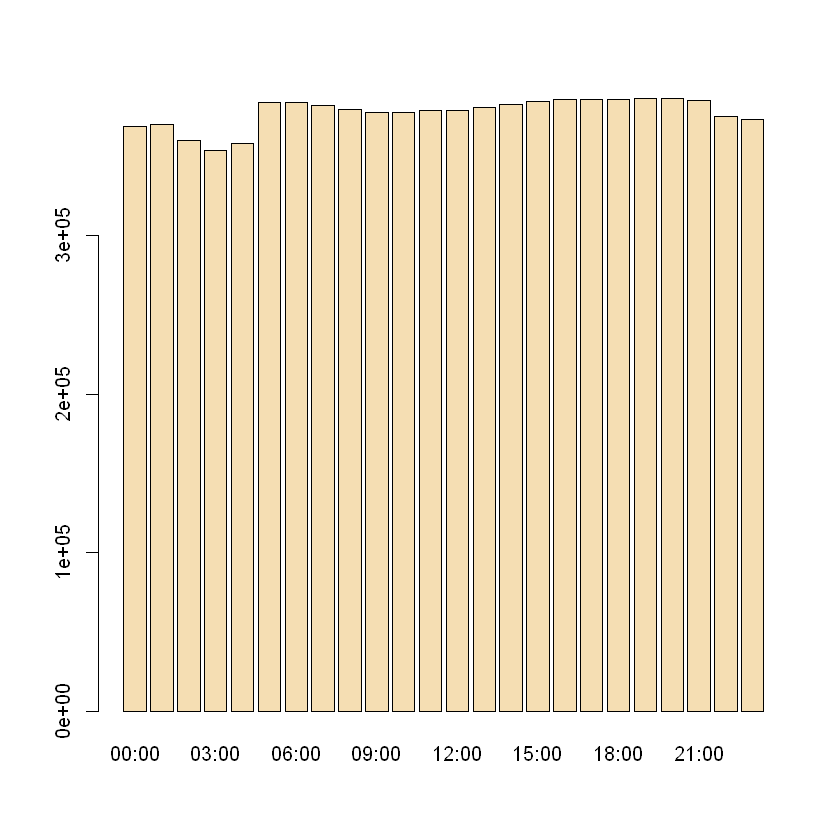

In [8]:
# Here, we have hourly ozone data that comes from monitors across the country.
# The monitors should be monitoring continuously during the day, so all hours should be represented
table(ozone$Time.Local) %>%
barplot(col = 'wheat')

In [9]:
# check same example where textbook found data issues on the older version of this dataset

filter(ozone,
       State.Code == '36'
       & County.Code == '033'
       & Date.Local == '2014-09-30'
       ) %>%
select(Date.Local, Time.Local, Sample.Measurement)

Date.Local,Time.Local,Sample.Measurement
<chr>,<chr>,<dbl>
2014-09-30,00:00,0.011
2014-09-30,01:00,0.012
2014-09-30,02:00,0.012
2014-09-30,03:00,0.011
2014-09-30,04:00,0.011
2014-09-30,05:00,0.011
2014-09-30,06:00,0.010
2014-09-30,07:00,0.010
2014-09-30,08:00,0.010


In [10]:
select(ozone, State.Name) %>%
unique() %>%
nrow()

[1] 53

In [11]:
unique(ozone$State.Name)

[1] "Alabama"              "Alaska"               "Arizona"             
 [4] "Arkansas"             "California"           "Colorado"            
 [7] "Connecticut"          "Delaware"             "District Of Columbia"
[10] "Florida"              "Georgia"              "Hawaii"              
[13] "Idaho"                "Illinois"             "Indiana"             
[16] "Iowa"                 "Kansas"               "Kentucky"            
[19] "Louisiana"            "Maine"                "Maryland"            
[22] "Massachusetts"        "Michigan"             "Minnesota"           
[25] "Mississippi"          "Missouri"             "Montana"             
[28] "Nebraska"             "Nevada"               "New Hampshire"       
[31] "New Jersey"           "New Mexico"           "New York"            
[34] "North Carolina"       "North Dakota"         "Ohio"                
[37] "Oklahoma"             "Oregon"               "Pennsylvania"        
[40] "Rhode Island"         "South Carolina"       "South Dakota"        
[43] "Tennessee"            "Texas"                "Utah"                
[46] "Vermont"              "Virginia"             "Washington"          
[49] "West Virginia"        "Wisconsin"            "Wyoming"             
[52] "Puerto Rico"          "Country Of Mexico"

# 7. Validate with at least one external source

Check ranges of values where you know what they should be based on...
1. Is it the correct order of magnitude?
1. Are the range of values what you would expect?

In [12]:
# In the U.S. we have national ambient air quality standards,
# and for ozone, the current standard set in 2008 is that the
# “annual fourth-highest daily maximum 8-hr concentration, averaged over 3 years”
# should not exceed 0.075 parts per million (ppm).

summary(ozone$Sample.Measurement)
# compared to the older version of the data set used in the texbook, I'm guessing the negative number is not valid

#more detail
quantile(ozone$Sample.Measurement, seq(0,1,0.1))

nrow(filter(ozone, Sample.Measurement<0))
nrow(filter(ozone, Sample.Measurement<0)) / nrow(ozone)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.00500  0.01900  0.03000  0.03027  0.04100  0.21300 

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
-0.005  0.009  0.016  0.022  0.026  0.030  0.035  0.039  0.043  0.050  0.213

[1] 2032

[1] 0.0002242654

# 8. Try the easy solution first

> "Which counties in the United States have the highest levels of ambient ozone pollution?"

In [13]:
# 1. create grouped table
# 2. create summary of Sample.Measurement against that grouping (name it "ozone")
# 3. sort "ozone" by descending order


rankedcounties <- group_by(ozone, State.Name, County.Name) %>%
                  summarize(ozone = mean(Sample.Measurement)) %>%
                  arrange(desc(ozone))

# just show top 10
head(rankedcounties,10)

`summarise()` has grouped output by 'State.Name'. You can override using the
`.groups` argument.


State.Name,County.Name,ozone
<chr>,<chr>,<dbl>
Colorado,Clear Creek,0.05022088
California,Mariposa,0.04849011
California,Nevada,0.04821713
Colorado,Park,0.04799988
Wyoming,Albany,0.04740057
Colorado,Chaffee,0.04732017
California,Inyo,0.04469113
Utah,San Juan,0.04435075
California,El Dorado,0.04363719


In [14]:
# ... all in the west.  What about the east?

tail(rankedcounties,10)

State.Name,County.Name,ozone
<chr>,<chr>,<dbl>
Georgia,DeKalb,0.020478241
New Jersey,Warren,0.020137471
Louisiana,West Baton Rouge,0.020091025
Washington,Whatcom,0.020079729
Oregon,Washington,0.019582854
Oklahoma,Caddo,0.017519115
Puerto Rico,Juncos,0.013462225
Alaska,Fairbanks North Star,0.013273003
Puerto Rico,Bayamon,0.008517895


In [15]:
# NEED TO CHANGE FIELD TO A DATE FIELD for the steps after this
ozone <- mutate(ozone, Date.Local = as.Date(Date.Local))


[1] 6447

[1] 8038

[1] 8760

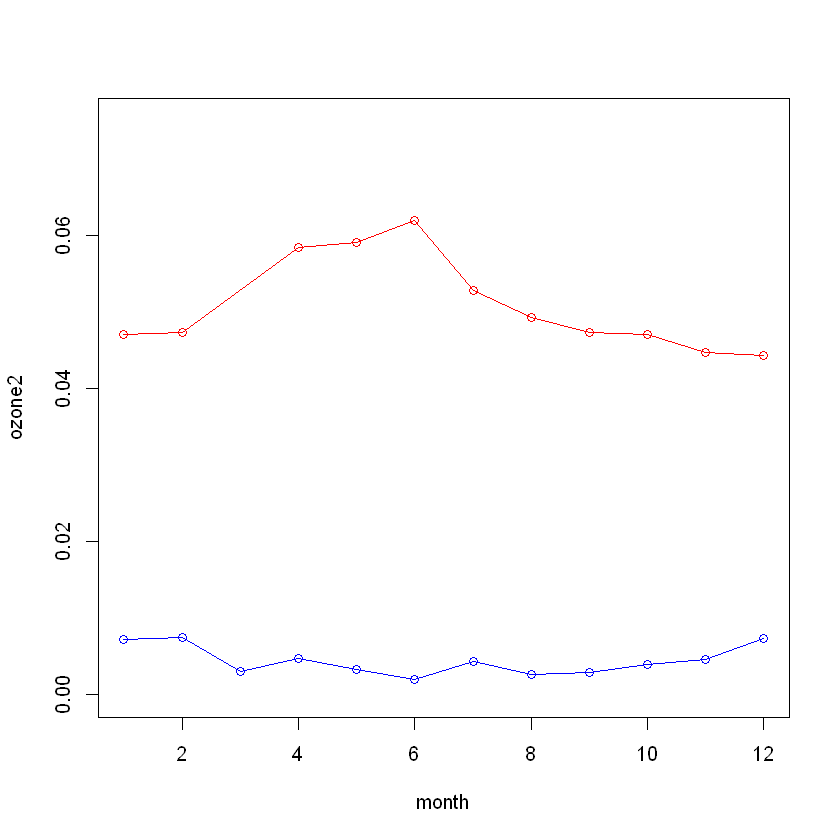

In [27]:
# good idea to check into the records/observations that go into the result, for example...
worstcounty <-filter(ozone, State.Name == 'Colorado' & County.Name == 'Clear Creek')
nrow(worstcounty)

bestcounty <-filter(ozone, State.Name == 'Puerto Rico' & County.Name == 'Catano')
nrow(bestcounty)

# hourly observations, there should be
365 * 24

# So, let's check it by month
mutate(worstcounty, month = format(Date.Local,'%m')) %>%
group_by(month) %>%
summarize(ozone2 = mean(Sample.Measurement)) %>%
plot(type='o', col='red', ylim=c(0,0.075))

# add another line for the best county
mutate(bestcounty, month = format(Date.Local,'%m')) %>%
group_by(month) %>%
summarize(ozone2 = mean(Sample.Measurement)) %>%
lines(type='o', col='blue')

# You can see that the Worst county is missing March data


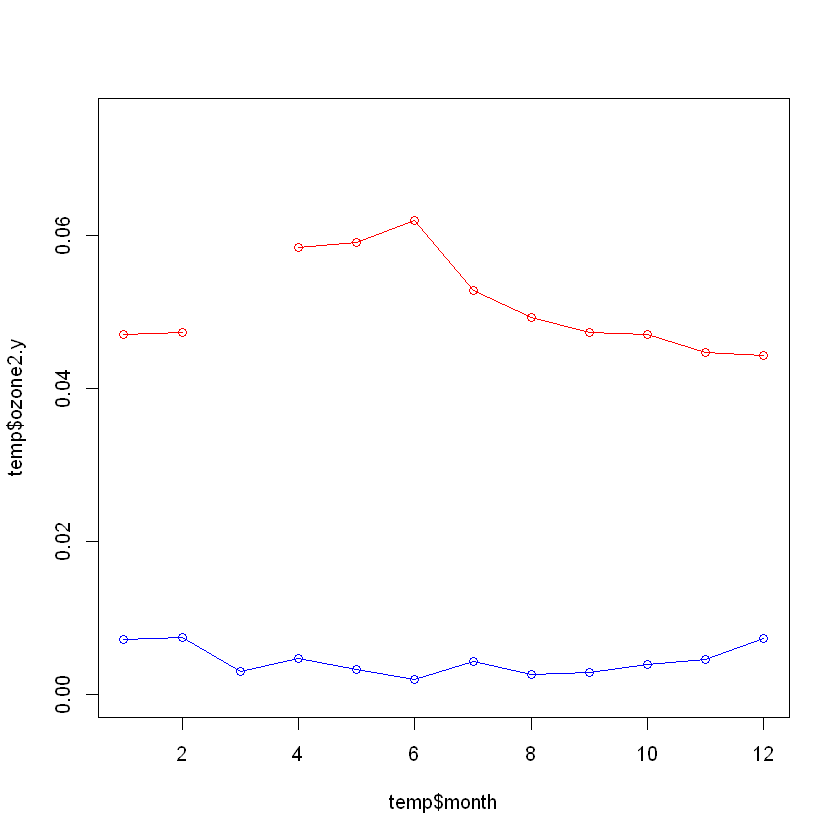

In [36]:
# try a fancier thing to see the blank more obviously


# So, let's check it by month
w <- mutate(worstcounty, month = format(Date.Local,'%m')) %>%
group_by(month) %>%
summarize(ozone2 = mean(Sample.Measurement))

# add another line for the best county
b <- mutate(bestcounty, month = format(Date.Local,'%m')) %>%
group_by(month) %>%
summarize(ozone2 = mean(Sample.Measurement))

temp<-merge(b, w, by='month', all=TRUE)
plot(temp$month, temp$ozone2.y, type='o', col='red', ylim=c(0,0.075))
lines(temp$month, temp$ozone2.x, type='o', col='blue')

# 9. Challenge your solution

Sensitivity testing? create a new dataset taking a random sampling of the records from the original data set.  Make it the same size as the original dataset.

In [39]:
set.seed(10234)
N <-nrow(ozone)
idx <- sample(N, N, replace=TRUE)
ozone2 <- ozone[idx,]

In [41]:
rankedcounties2 <- group_by(ozone2, State.Name, County.Name) %>%
                  summarize(ozone2 = mean(Sample.Measurement)) %>%
                  arrange(desc(ozone2))

cbind(head(rankedcounties,10),head(rankedcounties2,10))

cbind(tail(rankedcounties,10),tail(rankedcounties2,10))

# the answers are pretty close to the same, so the solution seems stable.

`summarise()` has grouped output by 'State.Name'. You can override using the
`.groups` argument.
New names:
• `State.Name` -> `State.Name...1`
• `County.Name` -> `County.Name...2`
• `State.Name` -> `State.Name...4`
• `County.Name` -> `County.Name...5`


State.Name...1,County.Name...2,ozone,State.Name...4,County.Name...5,ozone2
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Colorado,Clear Creek,0.05022088,Colorado,Clear Creek,0.05029723
California,Mariposa,0.04849011,California,Mariposa,0.04851848
California,Nevada,0.04821713,California,Nevada,0.04820596
Colorado,Park,0.04799988,Colorado,Park,0.04793101
Wyoming,Albany,0.04740057,Colorado,Chaffee,0.04742990
Colorado,Chaffee,0.04732017,Wyoming,Albany,0.04737101
California,Inyo,0.04469113,California,Inyo,0.04459566
Utah,San Juan,0.04435075,Utah,San Juan,0.04448041
California,El Dorado,0.04363719,California,El Dorado,0.04379298


New names:
• `State.Name` -> `State.Name...1`
• `County.Name` -> `County.Name...2`
• `State.Name` -> `State.Name...4`
• `County.Name` -> `County.Name...5`


State.Name...1,County.Name...2,ozone,State.Name...4,County.Name...5,ozone2
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Georgia,DeKalb,0.020478241,Georgia,DeKalb,0.020399422
New Jersey,Warren,0.020137471,New Jersey,Warren,0.020163714
Louisiana,West Baton Rouge,0.020091025,Washington,Whatcom,0.020023377
Washington,Whatcom,0.020079729,Louisiana,West Baton Rouge,0.019814119
Oregon,Washington,0.019582854,Oregon,Washington,0.019515490
Oklahoma,Caddo,0.017519115,Oklahoma,Caddo,0.017504521
Puerto Rico,Juncos,0.013462225,Puerto Rico,Juncos,0.013579437
Alaska,Fairbanks North Star,0.013273003,Alaska,Fairbanks North Star,0.013400340
Puerto Rico,Bayamon,0.008517895,Puerto Rico,Bayamon,0.008782167


# 10. Follow up Questions

from the textbook...

1. **Do you have the right data?** Sometimes at the conclusion of an exploratory data analysis, the conclusion is that the dataset is not really appropriate for this question. In this case, the dataset seemed perfectly fine for answering the question of which counties had the highest levels of ozone.

1. **Do you need other data?** One sub-question we tried to address was whether the county rankings were stable across years. We addressed this by resampling the data once to see if the rankings changed, but the better way to do this would be to simply get the data for previous years and re-do the rankings.

1. **Do you have the right question?** In this case, it’s not clear that the question we tried to answer has immediate relevance, and the data didn’t really indicate anything to increase the question’s relevance. For example, it might have been more interesting to assess which counties were in violation of the national ambient air quality standard, because determining this could have regulatory implications. However, this is a much more complicated calculation to do, requiring data from at least 3 previous years.

The goal of exploratory data analysis is to get you thinking about your data and reasoning about your question. At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.